In [2]:
import matplotlib.pyplot as plt
#import notebooks_pocs 
from notebooks_pocs.voice_utils import *
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme() 


__init__


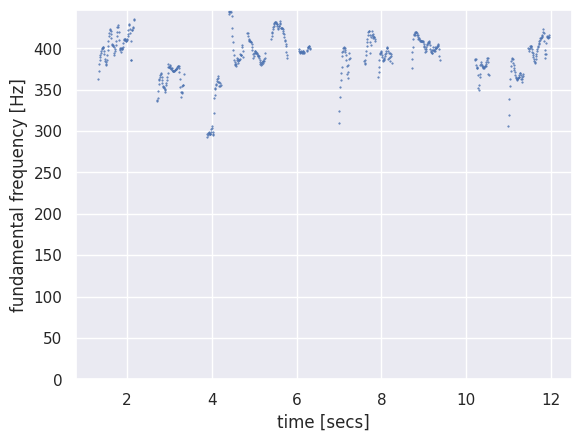

In [8]:
    #plt.figure()
    snd = parselmouth.Sound("/workspaces/voice-analysis/notebooks_pocs/audio/high.wav")


#def draw_pitch(plt, snd):
    pitch = snd.to_pitch()
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']

    pitch_values[pitch_values==0] = np.nan    
    plt.plot(pitch.xs(), pitch_values, '.', markersize=1)            
    plt.ylim(0, np.nanmax(pitch_values))  
    
    plt.ylabel("fundamental frequency [Hz]")
    plt.xlabel("time [secs]")
    
    
    plt.show() 

In [162]:
#type(pitch.xs()[0])
#pitch.xs().size
pitch.selected_array['frequency'].size
#print(type(pitch.xs()))

1356

In [7]:
df = pd.DataFrame(data=zip(pitch.xs(), pitch.selected_array['frequency']), columns=["seconds", "frequency"])
df.to_csv("high.wav.csv")
df

,seconds,frequency
0,0.02,0.0
1,0.03,0.0
2,0.04,0.0
3,0.05,0.0
4,0.06,0.0
...,...,...
1394,13.96,0.0
1395,13.97,0.0
1396,13.98,0.0
1397,13.99,0.0


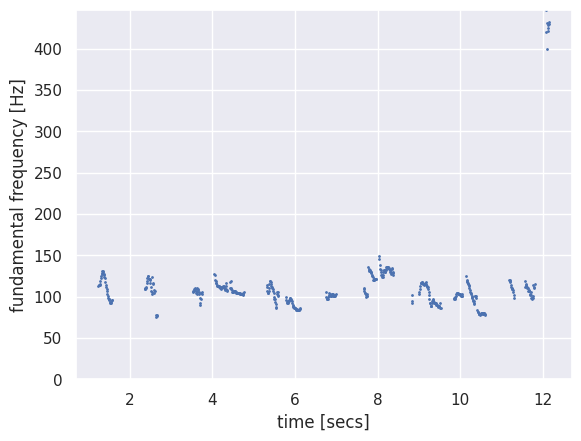

In [172]:
plt.figure()
snd = parselmouth.Sound("/workspaces/voice-analysis/notebooks_pocs/audio/low.wav")
draw_pitch(plt, snd)
#draw_intensity(plt, snd)
plt.show() 

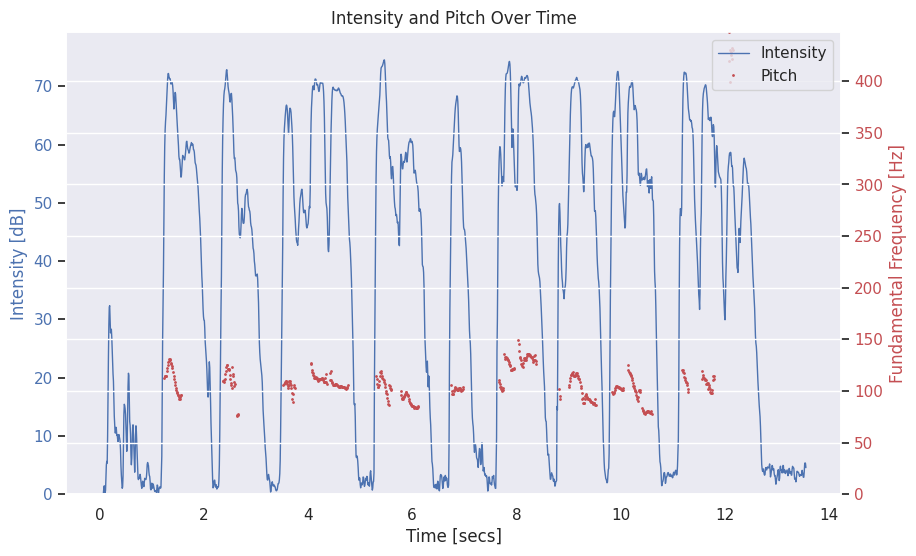

In [178]:
def normalize(data):
    #return (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data))
    return data


def draw_intensity_and_pitch(snd):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot intensity
    intensity = snd.to_intensity()
    ax1.plot(intensity.xs(), normalize(intensity.values.T), linewidth=1, label='Intensity')
    ax1.set_ylabel("Intensity [dB]", color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylim(0, None)
    ax1.grid(False)

    # Create a secondary y-axis for pitch
    ax2 = ax1.twinx()
    pitch = snd.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values == 0] = np.nan
    pitch_values =  normalize(pitch_values)
    ax2.plot(pitch.xs(), pitch_values, 'o', markersize=1, color='r', label='Pitch')
    ax2.set_ylabel("Fundamental Frequency [Hz]", color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim(0, np.nanmax(pitch_values))

    # Set x-axis label
    ax1.set_xlabel("Time [secs]")

    # Add legends
    fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.title("Intensity and Pitch Over Time")
    plt.show()

# Example usage
draw_intensity_and_pitch(snd)
